In [10]:
#!pip install tensorflow
#!pip install keras
import numpy as np
import tensorflow as tf

In [11]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [12]:
def createInputCSV(start,end,filename):
    inputData   = []
    outputData  = []
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
        
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [13]:
def processData(dataset):
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [14]:
def encodeData(data):
    processedData = []
    
    for dataInstance in data:
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [15]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [16]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


## Model Definition and Learning Rates

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

early_patience = 100
tb_batch_size = 32
#tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)


dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5, 0.8]

for lr in learning_rates:
    
    k.clear_session()
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=10))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    SGD = keras.optimizers.sgd(lr=lr)
    
    model.compile(optimizer= SGD,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    h = model.fit(processedData, processedLabel, epochs = 50, batch_size = 16, verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index = h.epoch))
    

In [293]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported], names = ['learning rate', 'metric'])

historydf.columns = idx

In [294]:
historydf

learning rate      0.01                0.05                0.10            \
metric             loss       acc      loss       acc      loss       acc   
0              1.262989  0.492222  1.177285  0.528889  1.175534  0.533333   
1              1.168341  0.532222  1.159092  0.533333  1.159231  0.534444   
2              1.156222  0.533333  1.153539  0.533333  1.152664  0.535556   
3              1.150988  0.533333  1.151297  0.534444  1.154600  0.531111   
4              1.148719  0.533333  1.144800  0.533333  1.140335  0.536667   
5              1.151784  0.533333  1.146861  0.533333  1.144688  0.533333   
6              1.148911  0.533333  1.142236  0.533333  1.137723  0.533333   
7              1.151127  0.533333  1.142756  0.533333  1.134256  0.533333   
8              1.146976  0.533333  1.140943  0.533333  1.131122  0.533333   
9              1.143588  0.533333  1.134175  0.533333  1.129254  0.533333   
10             1.146940  0.533333  1.138357  0.533333  1.119994  0.534444   
11             1.142482  0.533333  1.132902  0.533333  1.120484  0.533333   
12             1.137159  0.533333  1.135379  0.533333  1.113016  0.533333   
13             1.141112  0.533333  1.132895  0.533333  1.111703  0.538889   
14             1.144919  0.533333  1.130107  0.533333  1.109052  0.536667   
15             1.144061  0.533333  1.124222  0.532222  1.101530  0.536667   
16             1.144334  0.533333  1.125370  0.533333  1.094314  0.536667   
17             1.142577  0.533333  1.127417  0.533333  1.094829  0.538889   
18             1.136870  0.533333  1.123178  0.533333  1.084885  0.541111   
19             1.139409  0.533333  1.117799  0.533333  1.083649  0.555556   
20             1.136591  0.533333  1.119336  0.533333  1.077053  0.553333   
21             1.137667  0.533333  1.116640  0.533333  1.076306  0.540000   
22             1.142165  0.533333  1.115603  0.533333  1.076379  0.546667   
23             1.133923  0.533333  1.109445  0.533333  1.062767  0.547778   
24             1.133905  0.533333  1.112109  0.532222  1.045546  0.557778   
25             1.137596  0.533333  1.108152  0.533333  1.036671  0.564444   
26             1.134606  0.533333  1.100025  0.534444  1.035147  0.580000   
27             1.136263  0.533333  1.098270  0.533333  1.032907  0.567778   
28             1.137461  0.533333  1.095683  0.534444  1.032605  0.571111   
29             1.135761  0.533333  1.091491  0.535556  1.015476  0.578889   
30             1.136912  0.533333  1.087393  0.534444  1.005731  0.590000   
31             1.134654  0.533333  1.083924  0.536667  0.989661  0.580000   
32             1.128828  0.533333  1.073576  0.537778  0.987981  0.600000   
33             1.128035  0.533333  1.077981  0.537778  0.989556  0.584444   
34             1.136016  0.533333  1.073239  0.540000  0.984257  0.598889   
35             1.132593  0.533333  1.068683  0.548889  0.973609  0.586667   
36             1.132650  0.533333  1.070081  0.537778  0.964091  0.595556   
37             1.129520  0.533333  1.057703  0.545556  0.964640  0.622222   
38             1.130754  0.533333  1.055477  0.550000  0.953294  0.611111   
39             1.131418  0.533333  1.049596  0.566667  0.940411  0.613333   
40             1.129360  0.533333  1.054683  0.561111  0.929031  0.620000   
41             1.130419  0.533333  1.055616  0.562222  0.925118  0.626667   
42             1.128456  0.533333  1.037469  0.561111  0.939314  0.611111   
43             1.129041  0.533333  1.034291  0.564444  0.908162  0.633333   
44             1.128679  0.533333  1.024718  0.571111  0.930124  0.602222   
45             1.135253  0.533333  1.045754  0.563333  0.898946  0.618889   
46             1.126277  0.533333  1.022339  0.571111  0.895716  0.623333   
47             1.123338  0.533333  1.026358  0.566667  0.889418  0.632222   
48             1.129277  0.533333  1.016805  0.585556  0.876694  0.627778   
49             1.128144  0.533333  1.021011  0.588889  0.861212  0.662222

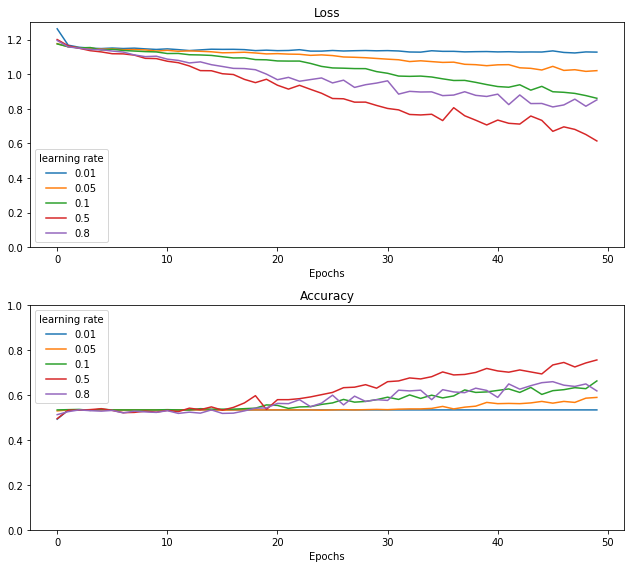

In [295]:
import matplotlib.pyplot as plt

ax = plt.subplot(211)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')
plt.xlabel("Epochs")

ax = plt.subplot(212)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")


plt.tight_layout(rect=[.5, 0, 2, 2])

# Batch Sizes

In [303]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    
    k.clear_session()
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=10))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    model.compile(optimizer= 'rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    h = model.fit(processedData, processedLabel, validation_split=0.2, epochs = 250, batch_size = batch_size, verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index = h.epoch))

In [304]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported], names = ['batch size', 'metric'])

historydf.columns = idx

In [305]:
historydf

batch size       16                                      32             \
metric      val_loss   val_acc      loss       acc  val_loss   val_acc   
0           1.145605  0.533333  1.190036  0.519444  1.169413  0.533333   
1           1.151827  0.533333  1.155242  0.533333  1.160778  0.533333   
2           1.150474  0.533333  1.155036  0.533333  1.144813  0.533333   
3           1.141353  0.533333  1.154376  0.533333  1.153881  0.533333   
4           1.143933  0.533333  1.144806  0.533333  1.148171  0.533333   
5           1.141873  0.533333  1.140228  0.533333  1.164968  0.533333   
6           1.157228  0.533333  1.127180  0.533333  1.154187  0.533333   
7           1.138467  0.533333  1.132008  0.533333  1.146558  0.533333   
8           1.140241  0.533333  1.125879  0.533333  1.144139  0.533333   
9           1.142060  0.533333  1.122346  0.533333  1.149207  0.533333   
10          1.140904  0.533333  1.117483  0.533333  1.150886  0.533333   
11          1.138452  0.533333  1.118468  0.533333  1.140482  0.533333   
12          1.135797  0.533333  1.108937  0.534722  1.144776  0.533333   
13          1.134733  0.533333  1.105566  0.533333  1.138760  0.533333   
14          1.133029  0.533333  1.097467  0.533333  1.142204  0.533333   
15          1.132302  0.533333  1.089713  0.533333  1.137960  0.533333   
16          1.127928  0.533333  1.093148  0.536111  1.140812  0.533333   
17          1.128227  0.533333  1.082882  0.533333  1.142655  0.533333   
18          1.126487  0.533333  1.080026  0.536111  1.138911  0.533333   
19          1.124002  0.533333  1.073427  0.538889  1.141485  0.533333   
20          1.124279  0.533333  1.064638  0.533333  1.140755  0.533333   
21          1.122483  0.533333  1.056403  0.538889  1.139985  0.533333   
22          1.116351  0.533333  1.054388  0.536111  1.139595  0.533333   
23          1.111762  0.533333  1.043471  0.537500  1.133976  0.533333   
24          1.112239  0.533333  1.036393  0.540278  1.131607  0.533333   
25          1.106188  0.533333  1.025953  0.544444  1.130621  0.533333   
26          1.102822  0.533333  1.024891  0.531944  1.130684  0.533333   
27          1.102046  0.533333  1.016776  0.545833  1.130864  0.533333   
28          1.094446  0.533333  1.006672  0.545833  1.129783  0.533333   
29          1.095806  0.522222  1.000067  0.548611  1.126441  0.533333   
..               ...       ...       ...       ...       ...       ...   
220         0.715723  0.800000  0.386818  0.863889  0.767134  0.827778   
221         0.706015  0.805556  0.374471  0.868056  0.761482  0.850000   
222         0.696296  0.833333  0.390150  0.868056  0.775540  0.844444   
223         0.694175  0.822222  0.350270  0.873611  0.793874  0.844444   
224         0.739341  0.733333  0.373787  0.868056  0.764366  0.838889   
225         0.698998  0.794444  0.379605  0.862500  0.752969  0.833333   
226         0.688980  0.827778  0.383521  0.858333  0.760854  0.844444   
227         0.682880  0.850000  0.381847  0.856944  0.760606  0.844444   
228         0.713152  0.788889  0.343625  0.879167  0.768298  0.827778   
229         0.751238  0.738889  0.378544  0.868056  0.755950  0.833333   
230         0.690890  0.794444  0.385999  0.872222  0.767077  0.833333   
231         0.736000  0.750000  0.336116  0.876389  0.763428  0.822222   
232         0.683086  0.850000  0.365998  0.879167  0.775377  0.833333   
233         0.698072  0.827778  0.357258  0.863889  0.751106  0.838889   
234         0.694348  0.805556  0.386489  0.873611  0.761003  0.833333   
235         0.730066  0.738889  0.369771  0.866667  0.778818  0.844444   
236         0.682676  0.822222  0.399602  0.854167  0.745587  0.844444   
237         0.679183  0.838889  0.334625  0.870833  0.757558  0.833333   
238         0.693080  0.833333  0.337797  0.883333  0.739803  0.850000   
239         0.677377  0.827778  0.357196  0.875000  0.756304  0.861111   
240         0.677240  0.855556  0.368422  0.862500  0.756777  0.838889   
241 

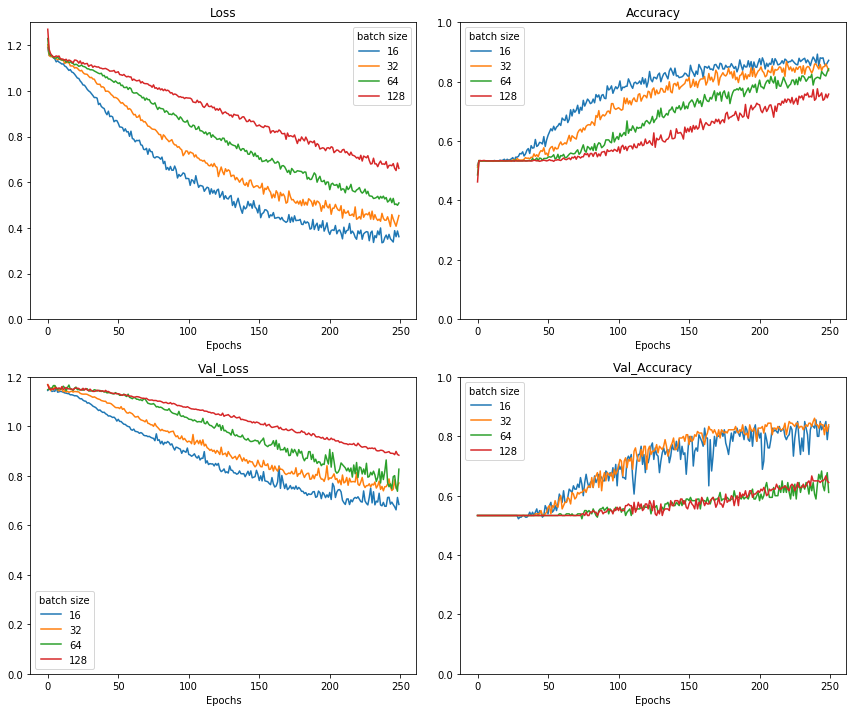

In [308]:
import matplotlib.pyplot as plt

ax = plt.subplot(221)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')
plt.xlabel("Epochs")

ax = plt.subplot(222)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(223)
historydf.xs('val_loss', axis = 1,level = 'metric').plot(ylim=(0,1.2) ,ax=ax)
plt.title('Val_Loss')
plt.xlabel("Epochs")

ax = plt.subplot(224)
historydf.xs('val_acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Val_Accuracy")
plt.xlabel("Epochs")


plt.tight_layout(rect=[.5, 0, 2.5, 2.5])

# Optimizers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

dflist = []

SGD = keras.optimizers.sgd(lr=0.01)
SGD2 = keras.optimizers.sgd(lr=0.01, momentum=0.3)
SGD3 = keras.optimizers.sgd(lr=0.01, momentum=0.3, nesterov=True)
Adam = keras.optimizers.adam(lr=0.01)
Adagrad = keras.optimizers.adagrad(lr=0.01)
RMSprop = keras.optimizers.rmsprop(lr=0.01)

optimizers = [SGD]
# , SGD2, SGD3, Adam, Adagrad, RMSprop
dataset = pd.read_csv('training.csv')
processedData, processedLabel = processData(dataset)
# for opt_name in optimizers:

k.clear_session()

model = Sequential()

model.add(Dense(256, input_dim=10))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer= SGD,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#     # Read Dataset


#     # Process Dataset

h = model.fit(processedData, processedLabel, validation_split=0.2, epochs = 100, batch_size = 128, verbose = 0)

dflist.append(pd.DataFrame(h.history, index = h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported], names = ['optimizers', 'metric'])

historydf.columns = idx

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(211)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout() 

# Dropout effect

In [270]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

dflist = []

dropouts = [0, 0.2, 0.4, 0.6, 0.8]

for dropout in dropouts:
    
    k.clear_session()
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=10))
    model.add(Activation('relu'))
    
    model.add(Dropout(dropout))
    
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    model.compile(optimizer= 'rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    h = model.fit(processedData, processedLabel, validation_split=0.2, epochs = 500, batch_size = 128, verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index = h.epoch))

In [271]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([dropouts, metrics_reported], names = ['dropout', 'metric'])

historydf.columns = idx

In [272]:
historydf

dropout       0.0                                     0.2                      \
metric   val_loss   val_acc      loss       acc  val_loss   val_acc      loss   
0        1.166374  0.533333  1.309564  0.409722  1.155893  0.533333  1.258179   
1        1.147100  0.533333  1.176053  0.533333  1.147963  0.533333  1.173270   
2        1.149972  0.533333  1.153202  0.533333  1.148081  0.533333  1.155300   
3        1.147941  0.533333  1.149843  0.533333  1.152879  0.533333  1.147942   
4        1.153364  0.533333  1.146088  0.533333  1.153207  0.533333  1.152676   
5        1.150135  0.533333  1.143853  0.533333  1.149868  0.533333  1.150537   
6        1.151108  0.533333  1.143624  0.533333  1.150652  0.533333  1.143781   
7        1.148601  0.533333  1.141089  0.533333  1.149387  0.533333  1.142562   
8        1.161693  0.533333  1.138334  0.533333  1.154955  0.533333  1.142634   
9        1.151002  0.533333  1.139982  0.533333  1.149940  0.533333  1.141303   
10       1.144944  0.533333  1.137371  0.533333  1.148249  0.533333  1.140804   
11       1.145635  0.533333  1.136869  0.533333  1.147834  0.533333  1.135848   
12       1.147875  0.533333  1.134291  0.533333  1.147871  0.533333  1.139787   
13       1.149609  0.533333  1.133356  0.533333  1.146567  0.533333  1.137418   
14       1.145453  0.533333  1.133182  0.533333  1.151070  0.533333  1.136552   
15       1.149390  0.533333  1.130147  0.533333  1.143634  0.533333  1.137868   
16       1.152063  0.533333  1.128611  0.533333  1.146431  0.533333  1.137099   
17       1.147266  0.533333  1.127613  0.533333  1.145671  0.533333  1.131062   
18       1.146854  0.533333  1.126300  0.533333  1.148588  0.533333  1.130154   
19       1.152725  0.533333  1.124972  0.533333  1.148783  0.533333  1.125914   
20       1.144842  0.533333  1.125611  0.533333  1.145925  0.533333  1.128664   
21       1.147807  0.533333  1.121590  0.533333  1.148702  0.533333  1.125105   
22       1.151427  0.533333  1.119491  0.533333  1.146446  0.533333  1.123878   
23       1.143619  0.533333  1.118768  0.533333  1.145727  0.533333  1.123616   
24       1.142592  0.533333  1.118781  0.533333  1.145302  0.533333  1.120598   
25       1.144469  0.533333  1.114532  0.533333  1.152479  0.533333  1.123720   
26       1.143498  0.533333  1.114773  0.533333  1.143776  0.533333  1.119573   
27       1.145611  0.533333  1.116468  0.533333  1.145171  0.533333  1.112498   
28       1.148783  0.533333  1.110031  0.533333  1.143919  0.533333  1.116888   
29       1.144059  0.533333  1.108330  0.533333  1.146173  0.533333  1.118239   
..            ...       ...       ...       ...       ...       ...       ...   
470      0.598819  0.772222  0.163973  0.993056  0.810898  0.755556  0.491643   
471      0.656973  0.705556  0.165530  0.991667  0.811235  0.761111  0.494499   
472      0.558418  0.822222  0.166819  0.988889  0.814326  0.755556  0.489505   
473      0.567092  0.805556  0.163371  0.991667  0.807695  0.761111  0.482206   
474      0.556828  0.811111  0.161817  0.994444  0.805701  0.766667  0.508502   
475      0.558004  0.811111  0.161061  0.993056  0.815915  0.738889  0.511357   
476      0.579184  0.783333  0.163135  0.991667  0.822375  0.722222  0.484555   
477      0.574526  0.800000  0.158252  0.993056  0.803521  0.733333  0.477736   
478      0.546866  0.822222  0.167847  0.990278  0.804091  0.744444  0.490831   
479      0.611380  0.744444  0.156768  0.990278  0.823992  0.722222  0.466691   
480      0.544481  0.816667  0.159397  0.990278  0.821746  0.722222  0.476057   
481      0.566790  0.805556  0.153086  0.993056  0.839278  0.683333  0.505429   
482      0.520707  0.827778  0.155655  0.994444  0.812974  0.733333  0.510343   
483      0.554853  0.805556  0.155393  0.993056  0.808417  0.772222  0.506803   
484      0.556981  0.816667  0.151458  0.995833  0.805403  0.761111  0.512224   
485      0.544889  0.827778  0.155716  0.991667  0.815729  0.722222  0.483154   
486      0.561133  0.805556  0.

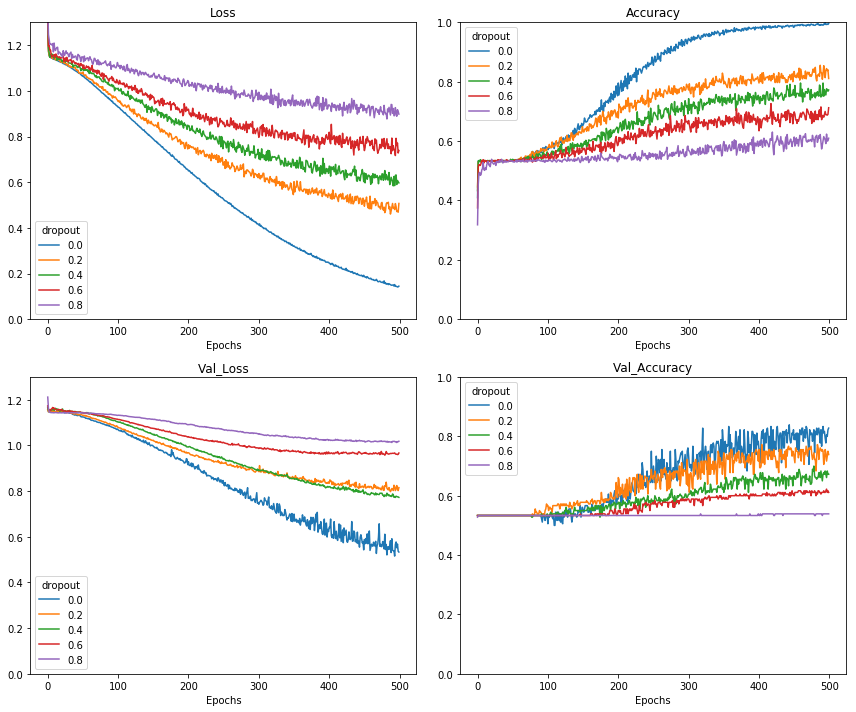

In [273]:
import matplotlib.pyplot as plt

ax = plt.subplot(221)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')
plt.xlabel("Epochs")

ax = plt.subplot(222)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(223)
historydf.xs('val_loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Val_Loss')
plt.xlabel("Epochs")

ax = plt.subplot(224)
historydf.xs('val_acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Val_Accuracy")
plt.xlabel("Epochs")


plt.tight_layout(rect=[.5, 0, 2.5, 2.5])

# Effects of activation functions in the hidden layer

In [322]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

dflist = []

activation_hidden = [None, 'sigmoid', 'softmax', 'tanh', 'relu']

for activation in activation_hidden:
    
    k.clear_session()
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=10))
    model.add(Activation(activation))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    model.compile(optimizer= 'rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    h = model.fit(processedData, processedLabel, validation_split=0.2, epochs = 500, batch_size = 32, verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index = h.epoch))

In [323]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([activation_hidden, metrics_reported], names = ['activation function', 'metric'])

historydf.columns = idx

In [324]:
historydf

activation function       NaN                                 sigmoid  \
metric               val_loss   val_acc      loss       acc  val_loss   
0                    1.149386  0.533333  1.219390  0.488889  1.153455   
1                    1.160269  0.533333  1.173236  0.531944  1.147716   
2                    1.168270  0.533333  1.162920  0.530556  1.168628   
3                    1.168962  0.533333  1.161532  0.530556  1.140345   
4                    1.149610  0.533333  1.162306  0.529167  1.198199   
5                    1.166296  0.533333  1.155704  0.534722  1.162746   
6                    1.140830  0.533333  1.162081  0.533333  1.145262   
7                    1.167821  0.533333  1.157535  0.530556  1.139630   
8                    1.151155  0.533333  1.170515  0.531944  1.146687   
9                    1.174491  0.533333  1.155921  0.534722  1.148795   
10                   1.148672  0.533333  1.158201  0.536111  1.144821   
11                   1.144776  0.533333  1.165725  0.531944  1.145953   
12                   1.151818  0.533333  1.156544  0.533333  1.148319   
13                   1.141889  0.533333  1.157735  0.533333  1.147031   
14                   1.149760  0.533333  1.164976  0.533333  1.158182   
15                   1.145790  0.533333  1.157171  0.533333  1.153277   
16                   1.154969  0.533333  1.159756  0.531944  1.141522   
17                   1.142832  0.533333  1.156879  0.531944  1.167357   
18                   1.144465  0.533333  1.162681  0.533333  1.153184   
19                   1.150601  0.533333  1.156559  0.533333  1.189417   
20                   1.149556  0.533333  1.155883  0.533333  1.141735   
21                   1.141768  0.533333  1.151307  0.533333  1.150492   
22                   1.145385  0.533333  1.153921  0.534722  1.150424   
23                   1.146102  0.533333  1.148727  0.533333  1.148955   
24                   1.149691  0.533333  1.156353  0.531944  1.139144   
25                   1.148744  0.533333  1.154137  0.531944  1.140914   
26                   1.151997  0.533333  1.149979  0.533333  1.141652   
27                   1.142647  0.533333  1.153475  0.533333  1.143999   
28                   1.144662  0.533333  1.156840  0.533333  1.138817   
29                   1.148951  0.533333  1.154448  0.533333  1.155578   
..                        ...       ...       ...       ...       ...   
470                  1.137891  0.533333  1.144085  0.533333  1.143521   
471                  1.137873  0.533333  1.141586  0.533333  1.150333   
472                  1.138751  0.533333  1.142044  0.533333  1.143803   
473                  1.138011  0.533333  1.141502  0.533333  1.141580   
474                  1.137828  0.533333  1.142063  0.533333  1.141611   
475                  1.137877  0.533333  1.142511  0.533333  1.141354   
476                  1.141039  0.533333  1.142520  0.533333  1.142817   
477                  1.140324  0.533333  1.141087  0.533333  1.145742   
478                  1.138106  0.533333  1.143044  0.533333  1.153141   
479                  1.137933  0.533333  1.141868  0.533333  1.144643   
480                  1.138629  0.533333  1.140605  0.533333  1.142251   
481                  1.138004  0.533333  1.143300  0.533333  1.145304   
482                  1.138770  0.533333  1.140977  0.533333  1.142348   
483                  1.138110  0.533333  1.144148  0.533333  1.142636   
484                  1.137910  0.533333  1.141452  0.533333  1.144656   
485                  1.137880  0.533333  1.141806  0.533333  1.142000   
486                  1.138163  0.533333  1.142121  0.533333  1.142800   
487                  1.137624  0.533333  1.142764  0.533333  1.142885   
488                  1.138221  0.533333  1.142188  0.533333  1.141666   
489                  1.138617  0.533333  1.143634  0.533333  1.145067   
490                  1.137986  0.533333  1.142272  0.533333  1.145413   
491                  1.138756  0.533333  1.138439  0.53333

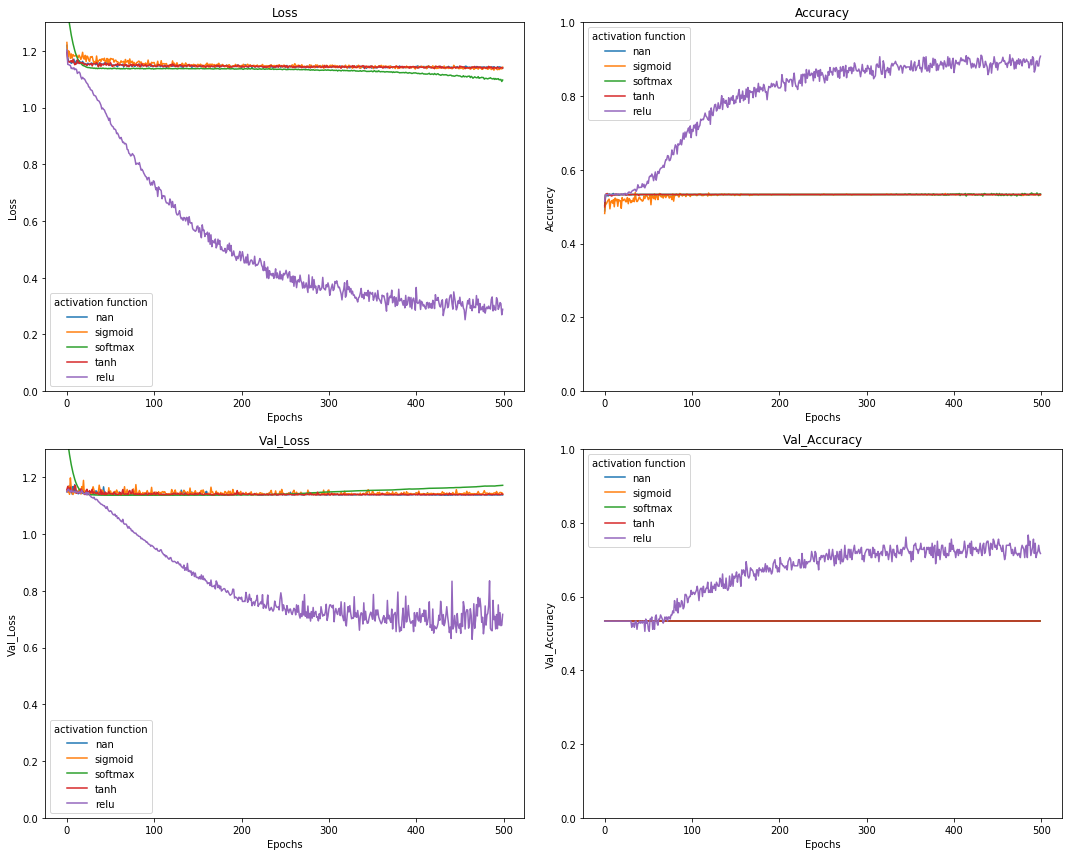

In [327]:
import matplotlib.pyplot as plt

ax = plt.subplot(221)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

ax = plt.subplot(222)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')

ax = plt.subplot(223)
historydf.xs('val_loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Val_Loss')
plt.xlabel("Epochs")
plt.ylabel('Val_Loss')

ax = plt.subplot(224)
historydf.xs('val_acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Val_Accuracy')

plt.tight_layout(rect=[.5, 0, 3, 3])

# Activation Functions for the Output Layer

In [336]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import keras.backend as k
import numpy as np

dflist = []

activation_hidden = [None, 'tanh', 'relu', 'sigmoid', 'softmax']

for activation in activation_hidden:
    
    k.clear_session()
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=10))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(4))
    model.add(Activation(activation))
    
    model.compile(optimizer= 'rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    h = model.fit(processedData, processedLabel, validation_split=0.2, epochs = 250, batch_size = 32, verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index = h.epoch))

In [337]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([activation_hidden, metrics_reported], names = ['activation_output_layer', 'metric'])

historydf.columns = idx

In [338]:
historydf

activation_output_layer        NaN                                     tanh  \
metric                    val_loss   val_acc       loss       acc  val_loss   
0                         3.483923  0.544444   5.286314  0.433333  4.660374   
1                         5.628942  0.527778   7.740348  0.505556  2.330307   
2                         7.074375  0.533333   8.252495  0.527778  1.312234   
3                         4.746028  0.533333   6.249289  0.531944  1.664211   
4                         4.884026  0.533333   7.613236  0.530556  3.575655   
5                         7.265020  0.511111   7.344901  0.504167  9.051265   
6                         7.866844  0.533333   8.091940  0.515278  1.542441   
7                         4.604735  0.422222   6.970413  0.479167  2.815445   
8                         7.758755  0.183333   8.994057  0.320833  3.418643   
9                         7.728610  0.188889   6.984897  0.238889  1.294638   
10                        7.280639  0.183333   7.769606  0.220833  1.477172   
11                        8.161080  0.155556   7.039492  0.204167  7.372006   
12                        1.643400  0.355556   6.249326  0.283333  8.093407   
13                        6.268438  0.288889   6.520137  0.362500  7.077509   
14                        8.223257  0.183333   8.836014  0.351389  1.956302   
15                        5.488924  0.177778   6.977492  0.247222  9.119684   
16                        6.922694  0.183333   7.305782  0.258333  7.629181   
17                        7.592838  0.177778   7.688602  0.266667  5.040059   
18                       11.573037  0.211111   8.065654  0.306944  6.389884   
19                        7.555719  0.133333   7.682136  0.215278  7.642591   
20                        7.564069  0.138889   6.740156  0.191667  8.276101   
21                        6.957993  0.188889   7.620584  0.248611  1.500384   
22                        8.476954  0.200000   7.397775  0.259722  3.015838   
23                        9.669365  0.200000   7.648710  0.248611  9.380912   
24                        9.081508  0.177778   8.028940  0.206944  8.443519   
25                        8.589834  0.222222   7.527835  0.236111  7.588190   
26                       10.674659  0.277778   7.640432  0.286111  7.390236   
27                        7.429668  0.211111   7.982994  0.259722  7.084731   
28                        8.251010  0.183333   8.019133  0.202778  5.552815   
29                        7.574545  0.150000   7.767172  0.209722  6.334320   
..                             ...       ...        ...       ...       ...   
220                      10.297672  0.411111   9.245519  0.411111  6.209201   
221                      10.297672  0.411111   8.932111  0.419444  6.719090   
222                      10.297672  0.411111   9.267905  0.422222  5.442461   
223                      10.297672  0.411111   9.133587  0.408333  4.420161   
224                      10.297672  0.411111   9.312677  0.413889  6.180752   
225                      10.297672  0.411111   9.178360  0.406944  5.449872   
226                      10.297672  0.411111   9.245519  0.412500  7.390374   
227                      10.297672  0.411111   9.178360  0.409722  4.786795   
228                      10.297672  0.411111   9.200746  0.405556  4.444452   
229                      10.297672  0.411111   9.088815  0.408333  4.527151   
230                      10.297672  0.411111   9.581312  0.406944  3.692804   
231                      10.297672  0.411111   9.357450  0.431944  4.894723   
232                      10.297672  0.411111   9.044042  0.405556  3.561258   
233                      10.297672  0.411111   8.932111  0.404167  4.888432   
234                      10.297672  0.411111   8.797794  0.401389  4.768259   
235                      10.745396  0.361111   8.977115  0.400000  8.311465   
236                      10.745396  0.361111  10.364831  0.373611  6.290395   
237                      10.745396  0.361111  10.3

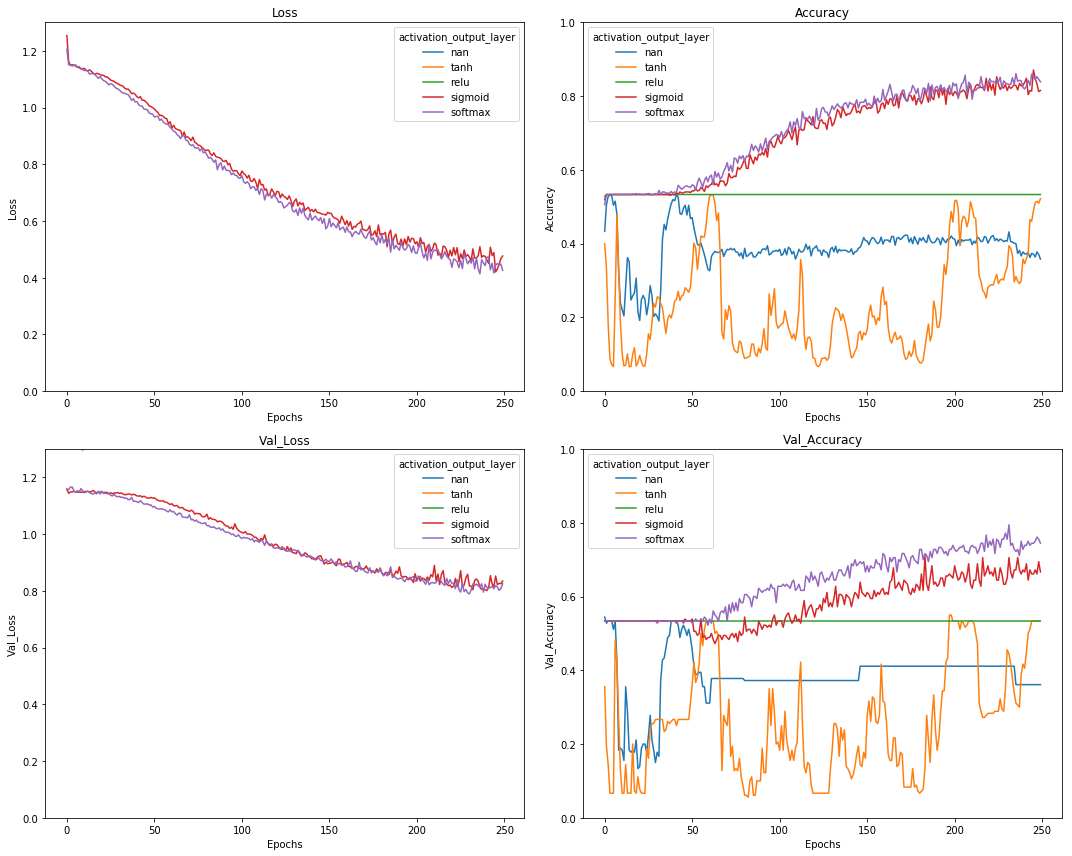

In [340]:
import matplotlib.pyplot as plt

ax = plt.subplot(221)
historydf.xs('loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

ax = plt.subplot(222)
historydf.xs('acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')

ax = plt.subplot(223)
historydf.xs('val_loss', axis = 1,level = 'metric').plot(ylim=(0,1.3) ,ax=ax)
plt.title('Val_Loss')
plt.xlabel("Epochs")
plt.ylabel('Val_Loss')

ax = plt.subplot(224)
historydf.xs('val_acc', axis = 1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Val_Accuracy')

plt.tight_layout(rect=[.5, 0, 3, 3])